# Import

In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import phik

# Content-Based Filtering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Collaborative Filtering
import tensorflow as tf
from tensorflow import keras
from pathlib import Path

import itertools
from collections import Counter

# Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

https://github.com/shaido987/novel-dataset/tree/master

In [2]:
data = 'https://raw.githubusercontent.com/JunTheCoder62/Feed/main/novels_0.1.4.csv'
df = pd.read_csv(data)
df

,id,name,assoc_names,original_language,authors,genres,tags,start_year,licensed,original_publisher,...,activity_all_time_rank,on_reading_lists,reading_list_month_rank,reading_list_all_time_rank,rating,rating_votes,related_series_ids,recommended_series_ids,recommendation_list_ids,chapter_latest_translated
0,5,Coiling Dragon,"['Bàn Long', 'CD', 'Pan Long', '盘龙']",chinese,"['i eat tomatoes', 'wo chi xi hong shi', '我吃西红柿']","['action', 'adventure', 'fantasy', 'seinen', '...","['academy', 'adapted to anime', 'adapted to ma...",2008,True,qidian,...,969,13435,22081,118,4.5,1893,[38],"[195, 38, 14, 15, 4052, 791]","[94336, 93781, 93743, 92934, 92891]",NaN
1,65541,The Curse of Desire,['（快穿）欲之咒'],chinese,"['chaste shirt', 'qingshan', '清衫']","['comedy', 'gender bender', 'psychological', '...","['adultery', 'beautiful female lead', 'clumsy ...",2020,NaN,po18,...,9882,690,13250,9544,3.3,21,NaN,"[46511, 61629, 68402, 67834, 69070]","[93562, 68310, 17662]",c103
2,65543,Anata no Koto ga Sukina Watashi wo Oshite Kure...,['Anata no Koto ga Sukina Watashi wo Oshite Ku...,japanese,"['ebisu seiji', '恵比須 清司']","['comedy', 'harem', 'romance', 'school life', ...","['beautiful female lead', 'celebrities', 'chil...",2023,False,fujimi fantasia bunko,...,11772,439,4575,12187,3.0,22,NaN,"[46332, 67421]","[87891, 85936, 83021]",v1 epilogue
3,10,Martial God Asura,"['MGA', 'Shura Valkyrie', 'Tu La Vu Than', 'Tu...",chinese,"['kindhearted bee', 'shan liang de mi feng', '...","['action', 'adventure', 'drama', 'harem', 'mat...","['absent parents', 'adapted to anime', 'adapte...",2013,True,17k,...,14,15167,108,77,3.3,2070,[3619],"[14, 2072, 840, 179, 791, 16]","[91449, 91371, 91224, 89159, 86780]",c20
4,65547,The Seed Thief,['씨앗 도둑'],korean,['백설홍'],"['adult', 'comedy', 'fantasy', 'romance', 'smut']","['abandoned children', 'clingy lover', 'c*nnil...",2022,False,ridibooks,...,9723,589,6973,10462,4.0,33,NaN,"[51446, 49277, 74144]","[90048, 80475, 76902, 75633, 75458]",v2c6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21826,65524,How to Fix Your Progamer,"['Progamer Rewrite', '프고쓰', '프로게이머 고쳐쓰기']",korean,['킬금'],"['drama', 'romance', 'shounen ai', 'sports']","['cold protagonist', 'comedic undertone', 'e-s...",2023,False,nile,...,18194,260,20152,15319,3.8,13,NaN,NaN,"[93392, 80286, 77261]",NaN
21827,65529,I’ve Never Seen a Lucky Player!,['幸运亿的玩家，没见过吧'],chinese,['临渊不羡鱼_'],"['action', 'adult', 'comedy', 'supernatural']","['beautiful female lead', 'calm protagonist', ...",NaN,NaN,NaN,...,16338,161,14908,17863,4.0,14,NaN,NaN,[89136],c10
21828,65531,My Childhood Friend Attacked Me When I Declare...,['My Childhood Friend Attacked Me When I Told ...,japanese,['まんぷく犬'],"['comedy', 'ecchi', 'romance', 'school life']","['childhood friends', 'first-time interc**rse'...",2023,False,kakuyomu,...,9728,366,11998,13335,3.0,28,NaN,NaN,[43969],c19
21829,65532,Classmate’s Engagement,['同学婚约'],chinese,['几京'],"['romance', 'yaoi']",[],2021,NaN,jjwxc,...,14905,392,18927,12933,4.3,15,NaN,NaN,"[85510, 81075, 76512, 76111, 74329]",c16


# 1. EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21831 entries, 0 to 21830
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          21831 non-null  int64  
 1   name                        21831 non-null  object 
 2   assoc_names                 21696 non-null  object 
 3   original_language           21831 non-null  object 
 4   authors                     21831 non-null  object 
 5   genres                      21831 non-null  object 
 6   tags                        21831 non-null  object 
 7   start_year                  19027 non-null  object 
 8   licensed                    9849 non-null   object 
 9   original_publisher          18931 non-null  object 
 10  english_publisher           2096 non-null   object 
 11  complete_original           20713 non-null  object 
 12  chapters_original_current   18168 non-null  object 
 13  complete_translated         166

In [4]:
df = df.drop(['start_year', 'original_language', 'original_publisher',
              'english_publisher', 'complete_original', 'chapters_original_current',
              'complete_translated', 'activity_week_rank', 'activity_month_rank', 'activity_all_time_rank',
              'on_reading_lists', 'reading_list_month_rank', 'recommendation_list_ids', 'chapter_latest_translated',
              'assoc_names', 'reading_list_all_time_rank', 'licensed', 'related_series_ids', 'recommended_series_ids',
              'release_freq'], axis=1)

Beberapa kolom mungkin tidak diperlukan dalam analisis atau tujuan spesifik yang ingin dicapai. Misalnya, kolom-kolom yang berkaitan dengan data penerbitan, peringkat aktivitas, atau informasi terkait lainnya mungkin tidak relevan jika fokus analisis adalah pada aspek lain dari dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21831 entries, 0 to 21830
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            21831 non-null  int64  
 1   name          21831 non-null  object 
 2   authors       21831 non-null  object 
 3   genres        21831 non-null  object 
 4   tags          21831 non-null  object 
 5   rating        21831 non-null  float64
 6   rating_votes  21831 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 1.2+ MB


In [6]:
df.isnull().sum()

id              0
name            0
authors         0
genres          0
tags            0
rating          0
rating_votes    0
dtype: int64

tidak ada data memiliki missing value

In [7]:
df = df.dropna()

In [8]:
df.duplicated().sum()

0

tidak ada duplikat dalam dataset sehingga data sudah clean.

In [9]:
df.describe(include=object)

,name,authors,genres,tags
count,21831,21831,21831,21831
unique,21823,15861,9490,20729
top,Dark Fire,[],"['fantasy', 'romance']",[]
freq,2,172,441,280


# 2. Data Preparation

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21831 entries, 0 to 21830
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            21831 non-null  int64  
 1   name          21831 non-null  object 
 2   authors       21831 non-null  object 
 3   genres        21831 non-null  object 
 4   tags          21831 non-null  object 
 5   rating        21831 non-null  float64
 6   rating_votes  21831 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 1.2+ MB


In [11]:
print('Jumlah Judul Buku:', len(df.name.unique()))
print('Jumlah Genre Buku:', len(df.genres.unique()))
print('Jumlah rating Buku :', len(df.rating.unique()))
print('Jumlah rating_votes Buku:', len(df.rating_votes.unique()))
print('Jumlah tags Buku:', len(df.tags.unique()))

Jumlah Judul Buku: 21823
Jumlah Genre Buku: 9490
Jumlah rating Buku : 40
Jumlah rating_votes Buku: 835
Jumlah tags Buku: 20729


pada tahap ini 

In [12]:
df['genres'].value_counts()

genres
['fantasy', 'romance']                                                                         441
['drama', 'fantasy', 'romance']                                                                297
['action', 'adventure', 'fantasy']                                                             245
['comedy', 'fantasy', 'romance']                                                               194
['romance']                                                                                    174
                                                                                              ... 
['adventure', 'drama', 'fantasy', 'mature', 'romance', 'sci-fi', 'tragedy', 'yaoi']              1
['action', 'adult', 'drama', 'harem', 'mature', 'romance', 'supernatural', 'xuanhuan']           1
['action', 'fantasy', 'mystery', 'romance', 'sci-fi', 'seinen', 'supernatural', 'xuanhuan']      1
['action', 'comedy', 'drama', 'romance', 'slice of life']                                        1
['a

## Fitur Genres

In [13]:
df['genres'] = df['genres'].str.split("|")

In [14]:
df['genres']

0        [['action', 'adventure', 'fantasy', 'seinen', ...
1        [['comedy', 'gender bender', 'psychological', ...
2        [['comedy', 'harem', 'romance', 'school life',...
3        [['action', 'adventure', 'drama', 'harem', 'ma...
4        [['adult', 'comedy', 'fantasy', 'romance', 'sm...
                               ...                        
21826       [['drama', 'romance', 'shounen ai', 'sports']]
21827      [['action', 'adult', 'comedy', 'supernatural']]
21828      [['comedy', 'ecchi', 'romance', 'school life']]
21829                                [['romance', 'yaoi']]
21830                                          [['drama']]
Name: genres, Length: 21831, dtype: object

dalam fitur genre terdapat 9490 genre buku dengan keunikan pada setiap buku.

In [15]:
flat_list = list(itertools.chain(*df['genres']))
counter_of_flat_list = Counter(flat_list)
categor_name_stat = pd.DataFrame(counter_of_flat_list.most_common(), columns=['genres', 'Jumlah genres buku'])
categor_name_stat.head(7)  

,genres,Jumlah genres buku
0,"['fantasy', 'romance']",441
1,"['drama', 'fantasy', 'romance']",297
2,"['action', 'adventure', 'fantasy']",245
3,"['comedy', 'fantasy', 'romance']",194
4,['romance'],174
5,['fantasy'],173
6,"['fantasy', 'romance', 'shoujo']",138


jumlah buku dengan fantasy romance lebih banyak.

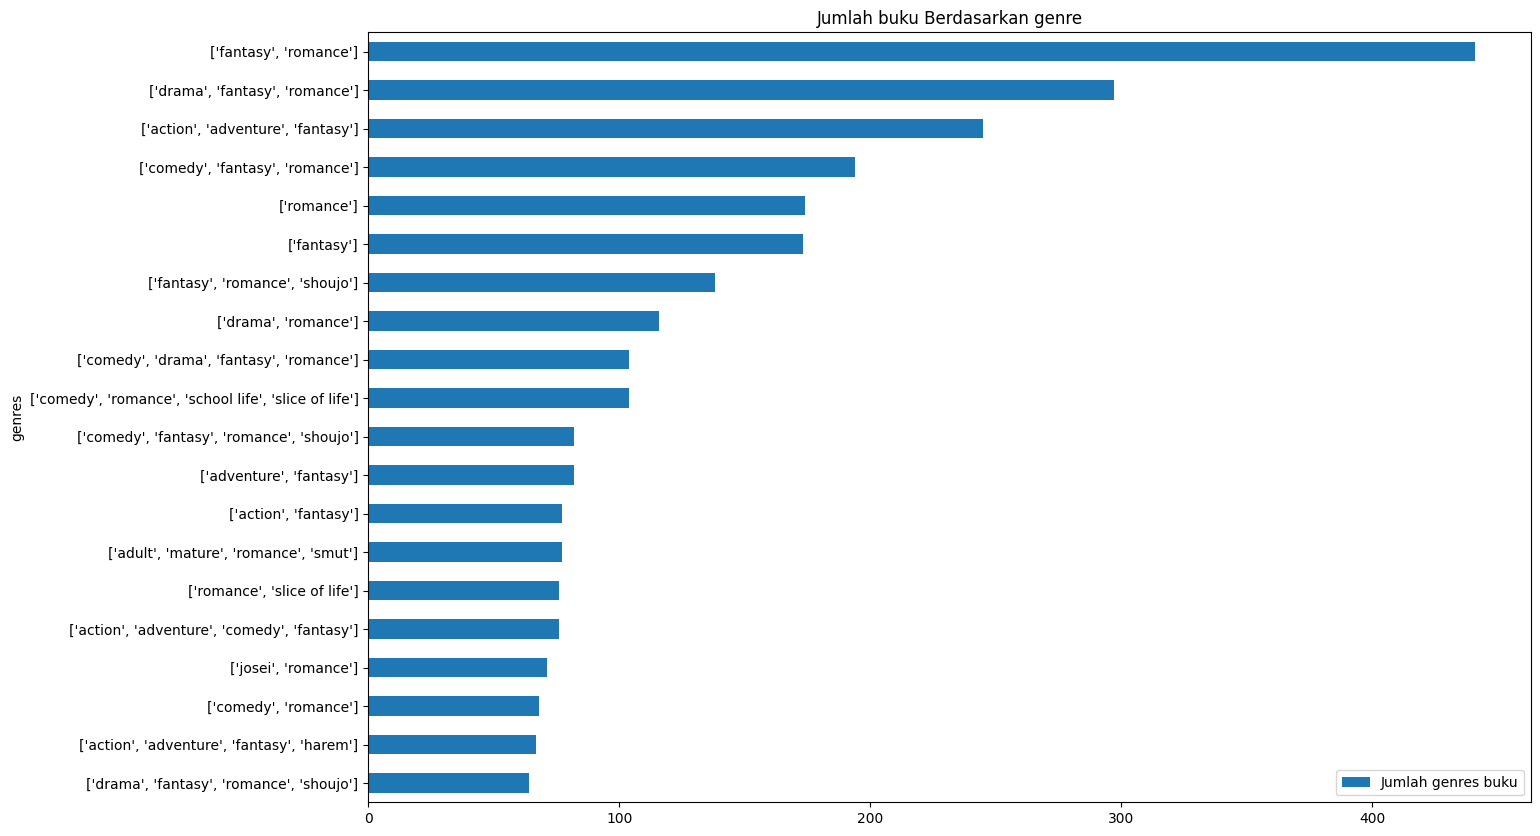

In [16]:

categor_name_stat.head(20).set_index('genres').sort_values(ascending=True, by="Jumlah genres buku").plot(kind='barh', title="Jumlah buku Berdasarkan genre", figsize=[15,10])
plt.show()

dapat dilihat bahwa data genre fantasy dan romance 

In [17]:
categor_name_stat['Jumlah data dalam persentase'] = ((categor_name_stat['Jumlah genres buku'] / categor_name_stat['Jumlah genres buku'].sum()) * 100).round(2)
categor_name_stat

,genres,Jumlah genres buku,Jumlah data dalam persentase
0,"['fantasy', 'romance']",441,2.02
1,"['drama', 'fantasy', 'romance']",297,1.36
2,"['action', 'adventure', 'fantasy']",245,1.12
3,"['comedy', 'fantasy', 'romance']",194,0.89
4,['romance'],174,0.80
...,...,...,...
9485,"['action', 'adventure', 'drama', 'slice of lif...",1,0.00
9486,"['adventure', 'fantasy', 'mystery', 'shoujo ai...",1,0.00
9487,"['action', 'drama', 'fantasy', 'mecha', 'sci-f...",1,0.00
9488,"['ecchi', 'romance', 'shoujo ai', 'slice of li...",1,0.00


In [18]:
df = df.sample(frac=1, random_state=42)
df

,id,name,authors,genres,tags,rating,rating_votes
12618,28731,Transcendent Dawn,"['the plagiarist', 'wen chao gong', '文抄公']","[['action', 'adventure', 'fantasy', 'supernatu...","['angels', 'body tempering', 'brainwashing', '...",3.6,45
14848,37974,My Wife Pretends to be Poor Everyday,['见鲸落'],"[['comedy', 'romance', 'slice of life', 'yuri']]","['beautiful female lead', 'carefree protagonis...",3.6,19
7739,79935,My Mysterious Nighttime Visitor,"['lee yeorae', '이여래']","[['drama', 'fantasy', 'josei', 'romance', 'sho...","['adapted to manhwa', 'alchemy', 'aristocracy'...",3.0,10
1807,68499,Even if it is Trampled and Broken,"['eunsolim', '은솔림']","[['drama', 'fantasy', 'romance']]","['abusive characters', 'aggressive characters'...",3.4,40
20354,60150,Why Is It Always the Boss Getting Shown Up?,"['mu ye yang yang', '牧野洋洋']","[['comedy', 'mature', 'shounen ai', 'yaoi']]","['boss-subordinate relationship', 'e-sports', ...",3.5,4
...,...,...,...,...,...,...,...
11964,25715,The Strong Wife from Peasant Family,"['qing yan', '轻言']","[['drama', 'fantasy', 'historical', 'romance',...","['age progression', 'ancient china', 'arranged...",3.8,67
21575,64677,Beware of the Strongest Man Who is Crazy About Me,['ed'],"[['fantasy', 'romance']]","['cross-dressing', 'empires', 'european ambien...",3.8,29
5390,9617,Lord of the Star Ocean,['深渊龙骑士'],"[['action', 'adventure', 'fantasy', 'martial a...","['body tempering', 'cultivation', 'determined ...",4.0,38
860,1421,Hako no Naka,['konohara narise'],"[['drama', 'mature', 'psychological', 'slice o...","['adultery', 'age progression', 'artists', 'au...",4.5,213


## Fitur Ratings

In [19]:
ratings = len(df.rating.unique())
print('Jumlah Rating unik: ', ratings)

Jumlah Rating unik:  40


In [20]:
df.rating.value_counts().to_frame(name="Jumlah rating")

,Jumlah rating
rating,
4.0,1768
3.8,1730
3.9,1508
3.7,1502
3.6,1397
4.1,1345
3.5,1328
3.4,1171
3.3,1144


dalam fitur rating dapat dilihat bahwa user banyak memberikan rating rentan 4 - 3.8 bintang untuk buku.

<Axes: title={'center': 'Banyaknya Buku dengan rating'}, xlabel='rating'>

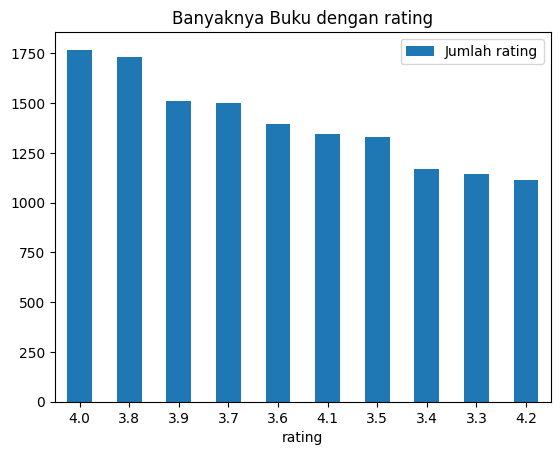

In [21]:
df.rating.value_counts().to_frame(name="Jumlah rating").head(10).plot(kind="bar", title="Banyaknya Buku dengan rating", rot= 0)

In [22]:
df.rating.value_counts().to_frame(name="Jumlah rating").describe()

,Jumlah rating
count,40.000000
mean,545.775000
std,577.155069
min,3.000000
25%,47.250000
50%,257.000000
75%,1087.750000
max,1768.000000


## TF-IDF

TF-IDF adalah algoritma yang mengidentifikasi kata-kata penting dalam suatu corpus. TF (Term Frequency) mewakili frekuensi kemunculan kata dalam teks, dihitung dari jumlah kemunculan kata tertentu dibandingkan total kata dalam corpus. Sementara itu, IDF (Inverse Document Frequency) mengukur seberapa penting suatu kata dalam keseluruhan corpus.


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21831 entries, 12618 to 15795
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            21831 non-null  int64  
 1   name          21831 non-null  object 
 2   authors       21831 non-null  object 
 3   genres        21831 non-null  object 
 4   tags          21831 non-null  object 
 5   rating        21831 non-null  float64
 6   rating_votes  21831 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 1.3+ MB


In [25]:
df.shape

(21831, 7)

In [26]:
tf = TfidfVectorizer()
df['genres'] = df['genres'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
tf.fit(df['genres'])
genres_features = pd.DataFrame(tf.get_feature_names_out(), columns=['genres'])

Dalam sistem rekomendasi buku ini, kolom genres digunakan untuk menemukan kemiripan antar buku, yang memungkinkan kita menghitung nilai kesamaan antara satu buku dengan buku lainnya. Untuk mendapatkan nilai kemiripan tersebut, kolom genres diubah menjadi vektor menggunakan algoritma TF-IDF.

In [27]:
print(genres_features)

           genres
0          action
1           adult
2       adventure
3              ai
4            arts
5          bender
6          comedy
7           drama
8           ecchi
9         fantasy
10             fi
11         gender
12          harem
13     historical
14         horror
15          josei
16           life
17        martial
18         mature
19          mecha
20        mystery
21             of
22  psychological
23        romance
24         school
25            sci
26         seinen
27         shoujo
28        shounen
29          slice
30           smut
31         sports
32   supernatural
33        tragedy
34          wuxia
35        xianxia
36       xuanhuan
37           yaoi
38           yuri


In [28]:
tfidf_matrix = tf.fit_transform(df['genres'])
tfidf_matrix.shape

(21831, 39)

In [29]:
tfidf_matrix.todense()

matrix([[0.35684665, 0.        , 0.37734056, ..., 0.65241629, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.68112041],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.23748529, 0.        , 0.25112421, ..., 0.43419007, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.3609994 ,
         0.        ],
        [0.24970571, 0.        , 0.        , ..., 0.        , 0.33879608,
         0.        ]])

In [30]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns = tf.get_feature_names_out(),
    index = df.name
).sample(24, axis=1).sample(7, axis=0)

,gender,seinen,adult,tragedy,comedy,martial,psychological,mecha,arts,xuanhuan,...,slice,xianxia,historical,of,ecchi,sci,fi,smut,fantasy,romance
name,,,,,,,,,,,,,,,,,,,,,
Breathing Life into Real Dolls,0.0,0.0,0.377027,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.502554,0.000000,0.000000,0.00000,0.000000,0.182009
Transmigrating Into a Book and Changing Your Life,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.562572,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.226239,0.000000
"I’m the Bad Guy, Can I Leave?",0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.260901,0.000000
Deliberate Plunder,0.0,0.0,0.500258,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.55874,0.000000,0.241498
Can You Save the Capture Target From the Main Character’s Clutches?,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.355809,0.000000
The Interstellar Pirate Leader That Kidnapped His Bride,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.599432,0.599432,0.00000,0.000000,0.233526
The One and Only Guide,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.387235,0.350378


Dalam model ini, fungsi TfidfVectorizer() dari library Scikit-learn digunakan untuk mengonversi kolom "genre" pada dataset menjadi vektor, dengan hasil vektorisasi yang ditampilkan pada gambar berikut.

# 3. Modelling

## Cosine similarity

In [31]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.06936599, ..., 0.50859033, 0.        ,
        0.08910665],
       [0.        , 1.        , 0.05014893, ..., 0.        , 0.3354144 ,
        0.11001298],
       [0.06936599, 0.05014893, 1.        , ..., 0.04616382, 0.09464601,
        0.03973912],
       ...,
       [0.50859033, 0.        , 0.04616382, ..., 1.        , 0.        ,
        0.40515766],
       [0.        , 0.3354144 , 0.09464601, ..., 0.        , 1.        ,
        0.12230518],
       [0.08910665, 0.11001298, 0.03973912, ..., 0.40515766, 0.12230518,
        1.        ]])

In [32]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=df['name'], columns=df['name'])
print('Shape :', cosine_sim_df.shape)
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape : (21831, 21831)


name,Rose Dust,The Strategy of Walkthrough,The Man Standing on Top of the Food Chain,Peerless Pill God,My Hotel Is Famous All Over the World
name,,,,,
"The Strongest Clan’s Master Is the Weakest and Most Evil Support Class ~Even with a Fail Job「Talker」, with My Brains and Dependable Allies’ Abilities, I’m the World’s Strongest Seeker~",0.211172,0.175171,0.383861,0.297367,0.035732
"After I Died, the Scum Gong’s Grief was Too Much for Him to Live",0.351954,0.114162,0.000000,0.000000,0.000000
Can You Afford To Raise?,0.148787,0.048262,0.000000,0.000000,0.000000
I Never Thought I Would Become an Olden Day Ruler,0.000000,0.460643,0.538532,0.504337,0.300474
The Kryptonian of a Certain American Comic,0.000000,0.100728,0.557501,0.280795,0.397758
Doomsday is Online,0.107944,0.156893,0.513722,0.211025,0.481282
Asylum Live Broadcast Room,0.581924,0.188758,0.000000,0.000000,0.000000
The Pet’s Temptation,0.170411,0.055276,0.000000,0.000000,0.000000
Kateikyoushi Hitman Reborn! – Secret Bullet,0.000000,0.198755,0.096472,0.199402,0.302888


Setelah data dikonversi menjadi bentuk vektor, selanjutnya ukur tingkat kesamaan antara dua vektor dan menentukan apakah kedua vektor tersebut menunjuk ke arah yang sama. Semakin kecil sudut cosinus, semakin besar nilai cosine similarity.

In [33]:
def books_recommendation(name, sim_df, items, k=1):
    ix = sim_df.loc[:,name].to_numpy().argpartition(range(-1,-k,-1))
    closest = sim_df.columns[ix[-1:-(k+2):-1]]
    closest = closest.drop(name, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

Pembuatan Funsi Book Recommendation

In [34]:
df[df.name == 'Little Thing Called Love']

,id,name,authors,genres,tags,rating,rating_votes
21561,64636,Little Thing Called Love,['大杯卡布奇诺'],"['comedy', 'romance', 'school life', 'slice of...","['college/university', 'female protagonist', '...",3.9,17


In [35]:
Book_title = 'The Legend of Futian'

In [36]:
books_recommendation(Book_title, cosine_sim_df, df[['id', 'name', 'genres', 'rating_votes', 'rating']], 5)

     

,name,id,genres,rating_votes,rating
0,Perfect World,978,"['action', 'adventure', 'comedy', 'drama', 'fa...",755,3.7
1,"Dragon Emperor, Martial God",6583,"['action', 'adventure', 'comedy', 'drama', 'fa...",222,3.8
2,It Starts With The Confession To The Beautiful...,62896,"['action', 'adventure', 'comedy', 'fantasy', '...",22,3.4
3,Mysterious World Beast God,12811,"['action', 'adventure', 'comedy', 'fantasy', '...",74,4.0
4,Invincible Leveling King,4323,"['action', 'adventure', 'comedy', 'fantasy', '...",163,3.3


Hasil Book Recommendations